In [ ]:
pip install docx2txt

In [ ]:
pip install texthero

In [ ]:
import pandas as pd
import numpy as np
import texthero as hero
import re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models.phrases import Phrases, Phraser
from plotly import __version__
import multiprocessing
import docx2txt
import io
%matplotlib inline
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/BT4222/data/MBTI.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(path)

In [ ]:
df_mbti = df.copy()

In [ ]:
df.head(1)

,Unnamed: 0,Tag,Cleaned_Text,Cleaned_Text_No_Emoticon,Text_stemmed,Bigram,Reddit,Twitter,Typology,Kaggle
0,0,ENFJ,memeincorrect quote sure trying keep peace family,memeincorrect quote sure trying keep peace family,memeincorrect quot sure tri peac famili,memeincorrect quote sure trying keep_peace family,1,0,0,0


(25874, 10) (16995, 10)


Text(0.5, 0.98, 'Number of Posts')

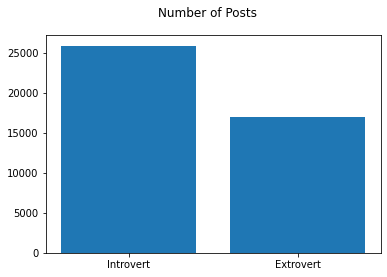

In [ ]:
corpus_i = df[(df["Tag"].astype(str).str[0] == "I") & (df["Typology"]==1)]
corpus_e = df[(df["Tag"].astype(str).str[0] == "E") & (df["Typology"]==1)]
print(corpus_i.shape,corpus_e.shape)
plt.bar(['Introvert','Extrovert'],[corpus_i.shape[0],corpus_e.shape[0]])
plt.suptitle('Number of Posts')

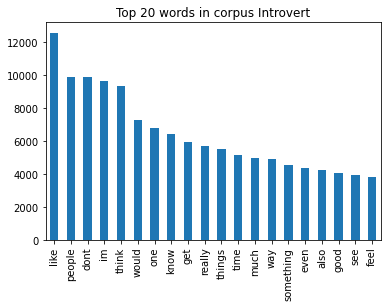

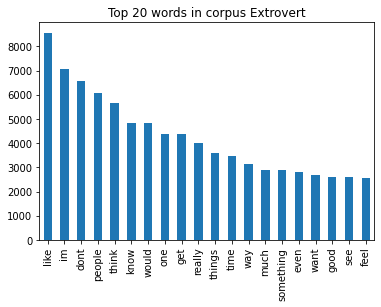

In [ ]:
import matplotlib.pyplot as plt
NUM_TOP_WORDS = 20
top_20_i = hero.visualization.top_words(corpus_i.loc[:, 'Cleaned_Text_No_Emoticon']).head(NUM_TOP_WORDS)
top_20_i.plot.bar(rot=90, title="Top 20 words in corpus Introvert");
plt.show(block=True);

top_20_e = hero.visualization.top_words(corpus_e.loc[:, 'Cleaned_Text_No_Emoticon']).head(NUM_TOP_WORDS)
top_20_e.plot.bar(rot=90, title="Top 20 words in corpus Extrovert");
plt.show(block=True);

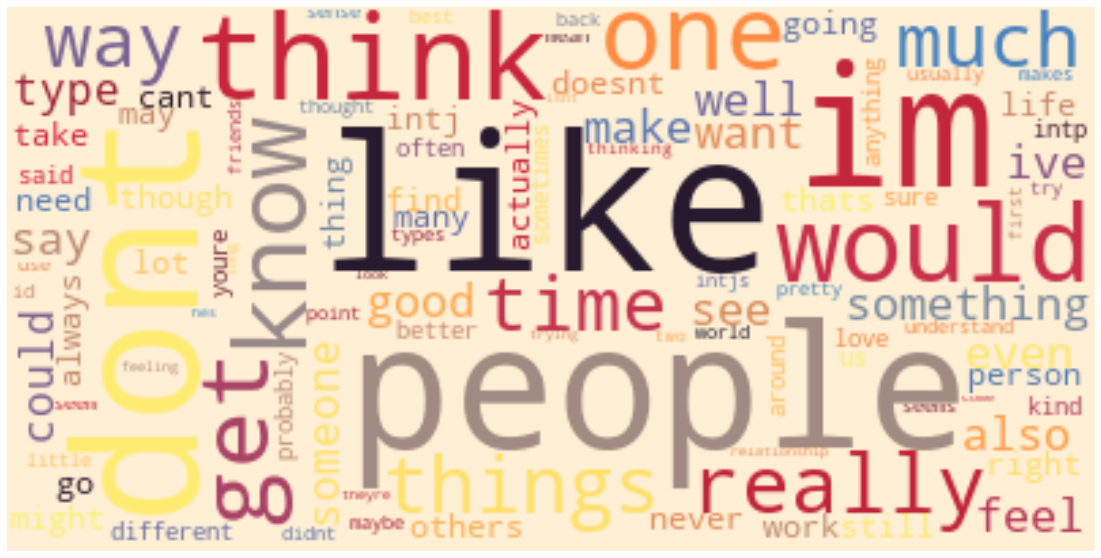

In [ ]:
#Plot wordcloud image using WordCloud method
hero.wordcloud(corpus_i.loc[:, 'Cleaned_Text_No_Emoticon'], max_words=100)

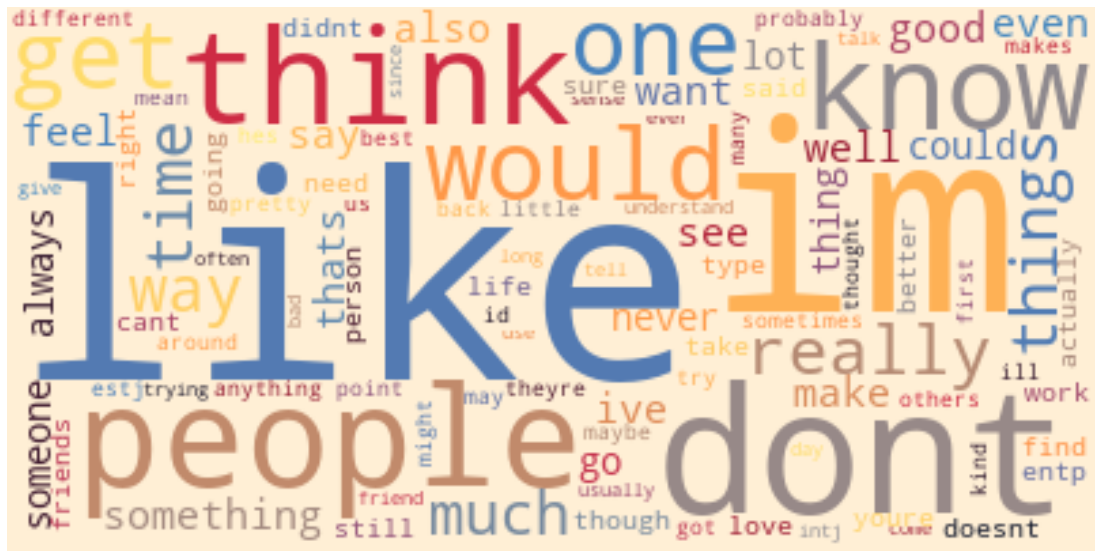

In [ ]:
#Plot wordcloud image using WordCloud method
hero.wordcloud(corpus_e.loc[:, 'Cleaned_Text_No_Emoticon'], max_words=100)

In [ ]:
def get_top_n_words(x,n):
  vec = CountVectorizer(ngram_range=(1,1), stop_words='english').fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x:x[1], reverse=True)
  return words_freq[:n]

In [ ]:
get_top_n_words(corpus_i,3)

[('unnamed', 1), ('tag', 1), ('cleaned_text', 1)]

In [ ]:
x = df['Cleaned_Text_No_Emoticon'].values.astype('U')
words = get_top_n_words(x, 20)
words

[('like', 95494),
 ('im', 87107),
 ('dont', 70360),
 ('think', 66964),
 ('people', 65253),
 ('know', 50152),
 ('really', 46311),
 ('time', 37420),
 ('ive', 31512),
 ('feel', 31233),
 ('things', 30425),
 ('way', 28563),
 ('good', 28287),
 ('want', 27299),
 ('say', 27229),
 ('love', 26121),
 ('make', 23395),
 ('lot', 22078),
 ('type', 21672),
 ('life', 19915)]

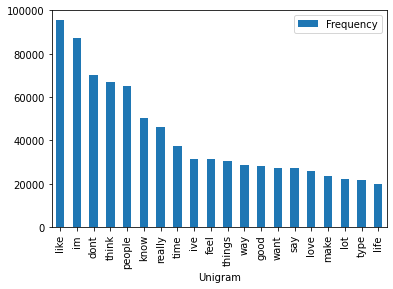

In [ ]:
# Unigram

uni_df = pd.DataFrame(words, columns = ['Unigram', 'Frequency'])
uni_df = uni_df.set_index('Unigram')
uni_df.plot(kind='bar')



In [ ]:
def get_top_n_words(x,n):
  vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(x)
  bow = vec.transform(x)
  sum_words = bow.sum(axis = 0)
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x:x[1], reverse=True)
  return words_freq[:n]

In [ ]:
x = corpus_i['Cleaned_Text_No_Emoticon'].values.astype('U')
words = get_top_n_words(x, 20)
words

[('dont know', 1253),
 ('dont think', 1057),
 ('feel like', 790),
 ('im sure', 673),
 ('dont like', 545),
 ('dont want', 505),
 ('originally posted', 486),
 ('dont really', 430),
 ('people dont', 363),
 ('things like', 350),
 ('sounds like', 350),
 ('im going', 344),
 ('think im', 276),
 ('dont care', 263),
 ('ive seen', 255),
 ('people think', 253),
 ('high school', 253),
 ('like im', 252),
 ('people like', 242),
 ('makes sense', 241)]

Text(0.5, 0.98, 'Top 20 Bigram words Introvert')

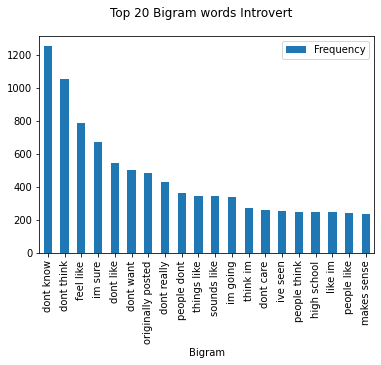

In [ ]:
# Bigram

bi_df = pd.DataFrame(words, columns = ['Bigram', 'Frequency'])
bi_df = bi_df.set_index('Bigram')
bi_df.plot(kind='bar')
plt.suptitle('Top 20 Bigram words Introvert')



In [ ]:
x = corpus_e['Cleaned_Text_No_Emoticon'].values.astype('U')
words = get_top_n_words(x, 20)
words

[('dont know', 930),
 ('dont think', 628),
 ('feel like', 614),
 ('im sure', 399),
 ('dont want', 374),
 ('dont like', 337),
 ('im going', 261),
 ('bored bored', 251),
 ('dont really', 250),
 ('originally posted', 228),
 ('sounds like', 222),
 ('things like', 198),
 ('people dont', 192),
 ('makes sense', 188),
 ('ive seen', 183),
 ('think im', 183),
 ('like im', 181),
 ('dont understand', 161),
 ('id say', 160),
 ('dont care', 160)]

Text(0.5, 0.98, 'Top 20 Bigram words Extrovert')

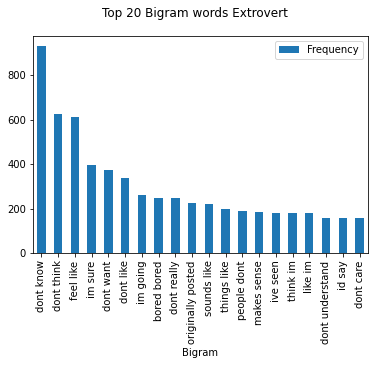

In [ ]:
# Bigram

bi_df = pd.DataFrame(words, columns = ['Bigram', 'Frequency'])
bi_df = bi_df.set_index('Bigram')
bi_df.plot(kind='bar')
plt.suptitle('Top 20 Bigram words Extrovert')